#### HW 2 NLP Lukyanov M

Тема “Создание признакового пространства”


Продолжим обработку данных с Твиттера. 


1. Создайте мешок слов с помощью sklearn.feature_extraction.text.CountVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'. 
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью CountVectorizer.get_feature_names().
 
 
2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно.
Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df.
Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000.
Исключим стоп-слова с помощью stop_words='english'.
Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().
 
 
3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре, составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора) обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров, так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы


In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)
import os
import pickle

In [2]:
with open('combine_df.pickle', 'rb') as f:
    combine_df = pickle.load(f)

In [3]:
combine_df

,id,label,tweet,tweet_token,tweet_token_filtered,tweet_stemmed,tweet_lemmatized
0,1,0.0,when father is dysfunctional and is so selfish...,"[when, father, is, dysfunctional, and, is, so,...","[father, dysfunctional, selfish, drags, kids, ...","[father, dysfunct, selfish, drag, kid, dysfunc...","[father, dysfunctional, selfish, drag, kid, dy..."
1,2,0.0,thanks for lyft credit cannot use cause they d...,"[thanks, for, lyft, credit, can, not, use, cau...","[thanks, lyft, credit, use, cause, offer, whee...","[thank, lyft, credit, use, caus, offer, wheelc...","[thanks, lyft, credit, use, cause, offer, whee..."
2,3,0.0,bihday your majesty,"[bihday, your, majesty]","[bihday, majesty]","[bihday, majesti]","[bihday, majesty]"
3,4,0.0,model love yoyou take with yoyou all the time ...,"[model, love, yoyou, take, with, yoyou, all, t...","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]","[model, love, yoyou, take, yoyou, time, yoyour]"
4,5,0.0,factsguide society now motivation,"[factsguide, society, now, motivation]","[factsguide, society, motivation]","[factsguid, societi, motiv]","[factsguide, society, motivation]"
...,...,...,...,...,...,...,...
49154,49155,NaN,thought factory left right polarisation trump ...,"[thought, factory, left, right, polarisation, ...","[thought, factory, left, right, polarisation, ...","[thought, factori, left, right, polaris, trump...","[thought, factory, left, right, polarisation, ..."
49155,49156,NaN,feeling like mermaid hairflip neverready forma...,"[feeling, like, mermaid, hairflip, neverready,...","[feeling, like, mermaid, hairflip, neverready,...","[feel, like, mermaid, hairflip, neverreadi, fo...","[feeling, like, mermaid, hairflip, neverready,..."
49156,49157,NaN,hillary campaigned today in ohio omg amp used ...,"[hillary, campaigned, today, in, ohio, omg, am...","[hillary, campaigned, today, ohio, omg, amp, u...","[hillari, campaign, today, ohio, omg, amp, use...","[hillary, campaigned, today, ohio, omg, amp, u..."
49157,49158,NaN,happy at work conference right mindset leads t...,"[happy, at, work, conference, right, mindset, ...","[happy, work, conference, right, mindset, lead...","[happi, work, confer, right, mindset, lead, cu...","[happy, work, conference, right, mindset, lead..."


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
count_vectorizer = CountVectorizer(max_df = 0.9, max_features = 1000, stop_words='english', preprocessor=lambda x: x, tokenizer=lambda x: x)

# Создаем the Bag-of-Words модель к 'tweet_stemmed'
bow_tw_stemmed = count_vectorizer.fit_transform(combine_df.tweet_stemmed.tolist())

# Отобразим Bag-of-Words модель как DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bow_tw_stemmed.toarray(), columns = feature_names)

C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(
C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
count_vectorizer2 = CountVectorizer(max_df = 0.9, max_features = 1000, stop_words='english', preprocessor=lambda x: x, tokenizer=lambda x: x)

# Создаем the Bag-of-Words модель к 'tweet_lemmatized'
bow_tw_lemmatized = count_vectorizer2.fit_transform(combine_df.tweet_lemmatized.tolist())

# Отобразим Bag-of-Words модель как DataFrame
feature_names2 = count_vectorizer2.get_feature_names()
pd.DataFrame(bow_tw_lemmatized.toarray(), columns = feature_names2)

C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(
C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,yo,yoga,york,young,youtube,yoyou,yoyour,yoyoyou,yr,yummy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49155,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


2. Создайте мешок слов с помощью sklearn.feature_extraction.text.TfidfVectorizer.fit_transform(). Применим его к 'tweet_stemmed' и 'tweet_lemmatized' отдельно. Игнорируем слова, частота которых в документе строго превышает порог 0.9 с помощью max_df. Ограничим количество слов, попадающий в мешок, с помощью max_features = 1000. Исключим стоп-слова с помощью stop_words='english'. Отобразим Bag-of-Words модель как DataFrame. columns необходимо извлечь с помощью TfidfVectorizer.get_feature_names().

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_df = 0.9, max_features = 1000, stop_words='english', preprocessor=lambda x: x, tokenizer=lambda x: x)
values_stemmed = tfidf_vectorizer.fit_transform(combine_df.tweet_stemmed.tolist())

# Show the Model as a pandas DataFrame
feature_names3 = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values_stemmed.toarray(), columns = feature_names3)

C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(
C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abl,absolut,accept,account,act,action,actor,actual,ad,adapt,...,yo,yoga,york,young,youtub,yoyou,yoyour,yoyoy,yr,yummi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.744148,0.392399,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0


In [8]:
tfidf_vectorizer2 = TfidfVectorizer(max_df = 0.9, max_features = 1000, stop_words='english', preprocessor=lambda x: x, tokenizer=lambda x: x)
values_lemmatized = tfidf_vectorizer2.fit_transform(combine_df.tweet_lemmatized.tolist())

# Show the Model as a pandas DataFrame
feature_names4 = tfidf_vectorizer2.get_feature_names()
pd.DataFrame(values_lemmatized.toarray(), columns = feature_names4)

C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(
C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,able,absolutely,account,act,action,actor,actually,adapt,add,adventure,...,yo,yoga,york,young,youtube,yoyou,yoyour,yoyoyou,yr,yummy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.742113,0.39173,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49154,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
49155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
49156,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0
49157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0


3. Проверьте ваши векторайзеры на корпусе который использовали на вебинаре,

составьте таблицу метод векторизации и скор который вы получили (в методах векторизации по изменяйте параметры что бы добиться лучшего скора)

обратите внимание как падает/растёт скор при уменьшении количества фичей, и изменении параметров,

так же попробуйте применить к векторайзерам PCA для сокращения размерности посмотрите на качество сделайте выводы

In [9]:
# Загружаем данные
data = open('corpus').read()
labels, texts = [], []
for i, line in enumerate(data.split("\n")):
    content = line.split()
    labels.append(content[0])
    texts.append(" ".join(content[1:]))

# создаем df
trainDF = pd.DataFrame()
trainDF['text'] = texts
trainDF['label'] = labels
trainDF.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tra...,__label__2
1,The best soundtrack ever to anything.: I'm rea...,__label__2
2,Amazing!: This soundtrack is my favorite music...,__label__2
3,Excellent Soundtrack: I truly like this soundt...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After He...",__label__2


так как векторайзеры без токенизации - токенизирую corpus

In [10]:
trainDF['tweet_token'] = [nltk.tokenize.word_tokenize(str(x)) for x in trainDF['text']]

In [11]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet

In [12]:
stemmer = PorterStemmer()
trainDF['text_stemmed']= [[stemmer.stem(word) for word in x] for x in trainDF['tweet_token']]

In [13]:
lemmatizer = WordNetLemmatizer()

In [14]:
trainDF['text_lemmatized']= [[lemmatizer.lemmatize(word) for word in x] for x in trainDF['tweet_token']]

In [15]:
from sklearn import model_selection, preprocessing, linear_model

train_x, valid_x, train_y, valid_y = model_selection.train_test_split(trainDF.drop(['label'], axis=1), trainDF['label'])

# labelEncode целевую переменную
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [16]:


# count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
# count_vect.fit(trainDF['text'])

xtrain_count =  count_vectorizer.transform(train_x['text_stemmed'])
xvalid_count =  count_vectorizer.transform(valid_x['text_stemmed'])

classifier = linear_model.LogisticRegression(max_iter = 1000)
classifier.fit(xtrain_count, train_y)
predictions = classifier.predict(xvalid_count)
predictions

array([0, 1, 1, ..., 1, 1, 1])

In [17]:
xtrain_count.shape

(7500, 1000)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
accuracy1 = accuracy_score(valid_y, predictions)
accuracy1

0.7944

In [20]:
trainDF['label'].value_counts()

__label__1    5097
__label__2    4903
Name: label, dtype: int64

In [21]:
models_results = {
    'vectorizer': [],
    'stem': [],
    'max_df': [],
    'max_feats': [],
    'accuracy': []
    }

In [22]:
models_results['vectorizer'].append('Count_vectorizer')
models_results['stem'].append('PorterStemmer')
models_results['max_df'].append(0.9)
models_results['max_feats'].append(1000)
models_results['accuracy'].append(accuracy1)

In [23]:
xtrain_count2 =  count_vectorizer2.transform(train_x['text_lemmatized'])
xvalid_count2 =  count_vectorizer2.transform(valid_x['text_lemmatized'])
    
classifier2 = linear_model.LogisticRegression(max_iter = 1000)
classifier2.fit(xtrain_count2, train_y)
predictions2 = classifier2.predict(xvalid_count2)

accuracy2 = accuracy_score(valid_y, predictions2)
accuracy2

0.7388

In [24]:
models_results['vectorizer'].append('Count_vectorizer')
models_results['stem'].append('WordNetLemmatizer')
models_results['max_df'].append(0.9)
models_results['max_feats'].append(1000)
models_results['accuracy'].append(accuracy2)

In [25]:
xtrain_count3 =  tfidf_vectorizer.transform(train_x['text_stemmed'])
xvalid_count3 =  tfidf_vectorizer.transform(valid_x['text_stemmed'])
        
classifier3 = linear_model.LogisticRegression(max_iter = 1000)
classifier3.fit(xtrain_count3, train_y)
predictions3 = classifier3.predict(xvalid_count3)

accuracy3 = accuracy_score(valid_y, predictions3)
accuracy3

0.8164

In [26]:
models_results['vectorizer'].append('TFIDF_vectorizer')
models_results['stem'].append('PorterStemmer')
models_results['max_df'].append(0.9)
models_results['max_feats'].append(1000)
models_results['accuracy'].append(accuracy3)

In [27]:
xtrain_count4 =  tfidf_vectorizer2.transform(train_x['text_lemmatized'])
xvalid_count4 =  tfidf_vectorizer2.transform(valid_x['text_lemmatized'])
        
classifier4 = linear_model.LogisticRegression(max_iter = 1000)
classifier4.fit(xtrain_count4, train_y)
predictions4 = classifier4.predict(xvalid_count4)

accuracy4 = accuracy_score(valid_y, predictions4)
accuracy4

0.7556

In [28]:
models_results['vectorizer'].append('TFIDF_vectorizer')
models_results['stem'].append('WordNetLemmatizer')
models_results['max_df'].append(0.9)
models_results['max_feats'].append(1000)
models_results['accuracy'].append(accuracy4)

In [29]:
pd.DataFrame(data=models_results).sort_values('accuracy', ascending=False)

,vectorizer,stem,max_df,max_feats,accuracy
2,TFIDF_vectorizer,PorterStemmer,0.9,1000,0.8164
0,Count_vectorizer,PorterStemmer,0.9,1000,0.7944
3,TFIDF_vectorizer,WordNetLemmatizer,0.9,1000,0.7556
1,Count_vectorizer,WordNetLemmatizer,0.9,1000,0.7388


In [30]:
def crossvTF (max_df = 0.9, max_features = 1000):
    #TFIDF lemmatized
    vectorizer = TfidfVectorizer(max_df = max_df, max_features = max_features, stop_words='english', preprocessor=lambda x: x, tokenizer=lambda x: x)
    vectorizer.fit_transform(combine_df.tweet_lemmatized.tolist())
    
    xtrain_count =  vectorizer.transform(train_x['text_lemmatized'])
    xvalid_count =  vectorizer.transform(valid_x['text_lemmatized'])

    classifier = linear_model.LogisticRegression(max_iter = 1000)
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)

    accuracy = accuracy_score(valid_y, predictions)
    
    models_results['vectorizer'].append('TFIDF_vectorizer')
    models_results['stem'].append('WordNetLemmatizer')
    models_results['max_df'].append(max_df)
    models_results['max_feats'].append(max_features)
    models_results['accuracy'].append(accuracy)
    #TFIDF stemmed
    vectorizer = TfidfVectorizer(max_df = max_df, max_features = max_features, stop_words='english', preprocessor=lambda x: x, tokenizer=lambda x: x)
    vectorizer.fit_transform(combine_df.tweet_stemmed.tolist())
    
    xtrain_count =  vectorizer.transform(train_x['text_stemmed'])
    xvalid_count =  vectorizer.transform(valid_x['text_stemmed'])

    classifier = linear_model.LogisticRegression(max_iter = 1000)
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)

    accuracy = accuracy_score(valid_y, predictions)
    
    models_results['vectorizer'].append('TFIDF_vectorizer')
    models_results['stem'].append('PorterStemmer')
    models_results['max_df'].append(max_df)
    models_results['max_feats'].append(max_features)  
    models_results['accuracy'].append(accuracy)

    #Count lemmatized
    vectorizer = CountVectorizer(max_df = max_df, max_features = max_features, stop_words='english', preprocessor=lambda x: x, tokenizer=lambda x: x)
    vectorizer.fit_transform(combine_df.tweet_lemmatized.tolist())
    
    xtrain_count =  vectorizer.transform(train_x['text_lemmatized'])
    xvalid_count =  vectorizer.transform(valid_x['text_lemmatized'])

    classifier = linear_model.LogisticRegression(max_iter = 1000)
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)

    accuracy = accuracy_score(valid_y, predictions)
    
    models_results['vectorizer'].append('Count_vectorizer')
    models_results['stem'].append('WordNetLemmatizer')
    models_results['max_df'].append(max_df)
    models_results['max_feats'].append(max_features)
    models_results['accuracy'].append(accuracy)
    #Count stemmed
    vectorizer = CountVectorizer(max_df = max_df, max_features = max_features, stop_words='english', preprocessor=lambda x: x, tokenizer=lambda x: x)
    vectorizer.fit_transform(combine_df.tweet_stemmed.tolist())
    
    xtrain_count =  vectorizer.transform(train_x['text_stemmed'])
    xvalid_count =  vectorizer.transform(valid_x['text_stemmed'])

    classifier = linear_model.LogisticRegression(max_iter = 1000)
    classifier.fit(xtrain_count, train_y)
    predictions = classifier.predict(xvalid_count)

    accuracy = accuracy_score(valid_y, predictions4)
    
    models_results['vectorizer'].append('Count_vectorizer')
    models_results['stem'].append('PorterStemmer')
    models_results['max_df'].append(max_df)
    models_results['max_feats'].append(max_features)
    models_results['accuracy'].append(accuracy)    


In [31]:
# "обнулим" результаты, пересчитаем все варианты

models_results = {
    'vectorizer': [],
    'stem': [],
    'max_df': [],
    'max_feats': [],
    'accuracy': []
    }

In [32]:
for max_df in [0.5, 0.7,  0.9]:
    for max_features in [500, 1000, 5000, 10000, 20000]:
        crossvTF(max_df, max_features)

C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(
C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(
C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 

C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(
C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(
C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 

C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(
C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(
C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 

In [33]:
df_models_results = pd.DataFrame(data=models_results)
df_models_results.sort_values('accuracy', ascending=False)

,vectorizer,stem,max_df,max_feats,accuracy
29,TFIDF_vectorizer,PorterStemmer,0.7,5000,0.8476
49,TFIDF_vectorizer,PorterStemmer,0.9,5000,0.8476
9,TFIDF_vectorizer,PorterStemmer,0.5,5000,0.8476
13,TFIDF_vectorizer,PorterStemmer,0.5,10000,0.8460
33,TFIDF_vectorizer,PorterStemmer,0.7,10000,0.8460
53,TFIDF_vectorizer,PorterStemmer,0.9,10000,0.8460
57,TFIDF_vectorizer,PorterStemmer,0.9,20000,0.8440
37,TFIDF_vectorizer,PorterStemmer,0.7,20000,0.8440
17,TFIDF_vectorizer,PorterStemmer,0.5,20000,0.8440
16,TFIDF_vectorizer,WordNetLemmatizer,0.5,20000,0.8180


In [34]:
df_models_results['vect&stem'] = df_models_results['vectorizer'] +'&' + df_models_results['stem']

(0.65, 0.85)

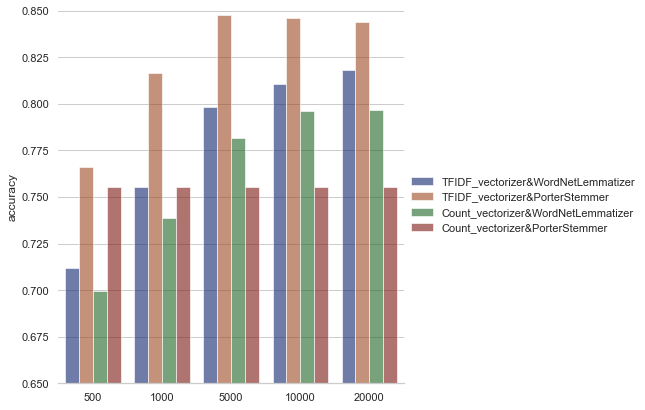

In [35]:
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data=df_models_results, kind="bar",
    x="max_feats", y="accuracy", hue="vect&stem",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "accuracy")
g.legend.set_title("")
plt.ylim(0.65,0.85)

Выводы: Наилучший результат дает сочетание TFIDF_vectorizer&PorterStemmer, при этом увеличение количества фичей улучшает метрику (кроме комбинации Count_vectorizer и PorterStemmer, здесь зависимости от max_features практически нет). Также при использовании сочетания TFIDF_vectorizer&PorterStemmer увеличение кол-ва фичей дает эффект до определенного предела (более 5000 уже не дает прироста качества)

(0.65, 0.85)

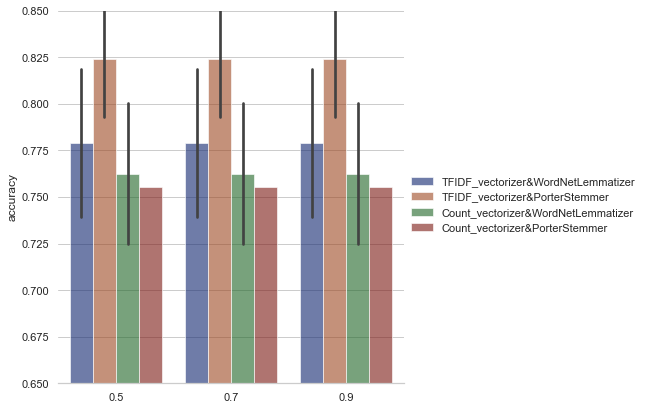

In [36]:
sns.set_theme(style="whitegrid")


g = sns.catplot(
    data=df_models_results, kind="bar",
    x="max_df", y="accuracy", hue="vect&stem",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "accuracy")
g.legend.set_title("")
plt.ylim(0.65,0.85)

Выводы: Здесь также видно, что наилучший результат дает сочетание TFIDF_vectorizer&PorterStemmer, при этом изменение max_df почти не влияет на метрику.

Применим к лучшей конфигурации векторайзера PCA для сокращения размерности

In [37]:
from sklearn.decomposition import TruncatedSVD

In [39]:
pca = TruncatedSVD(n_components = 7500)
#TFIDF stemmed
max_df = 0.5
max_features = 20000
vectorizer = TfidfVectorizer(max_df = max_df, max_features = max_features, stop_words='english', preprocessor=lambda x: x, tokenizer=lambda x: x)
vectorizer.fit_transform(combine_df.tweet_stemmed.tolist())

xtrain_count =  vectorizer.transform(train_x['text_stemmed'])
xvalid_count =  vectorizer.transform(valid_x['text_stemmed'])

xtrain_count = pca.fit_transform(xtrain_count)
xvalid_count = pca.transform(xvalid_count)

classifier = linear_model.LogisticRegression(max_iter = 1000)
classifier.fit(xtrain_count, train_y)
predictions = classifier.predict(xvalid_count)

accuracy = accuracy_score(valid_y, predictions)

models_results['vectorizer'].append('TFIDF_vectorizer SVD')
models_results['stem'].append('PorterStemmer')
models_results['max_df'].append(max_df)
models_results['max_feats'].append(max_features)  
models_results['accuracy'].append(accuracy)


C:\Users\LMAXL\Anaconda3\envs\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [45]:
df_models_results = pd.DataFrame(data=models_results)
df_models_results.loc[df_models_results['vectorizer'].isin(['TFIDF_vectorizer', 'TFIDF_vectorizer SVD'])].sort_values('accuracy', ascending=False)

,vectorizer,stem,max_df,max_feats,accuracy
29,TFIDF_vectorizer,PorterStemmer,0.7,5000,0.8476
49,TFIDF_vectorizer,PorterStemmer,0.9,5000,0.8476
9,TFIDF_vectorizer,PorterStemmer,0.5,5000,0.8476
53,TFIDF_vectorizer,PorterStemmer,0.9,10000,0.8460
13,TFIDF_vectorizer,PorterStemmer,0.5,10000,0.8460
33,TFIDF_vectorizer,PorterStemmer,0.7,10000,0.8460
17,TFIDF_vectorizer,PorterStemmer,0.5,20000,0.8440
57,TFIDF_vectorizer,PorterStemmer,0.9,20000,0.8440
37,TFIDF_vectorizer,PorterStemmer,0.7,20000,0.8440
60,TFIDF_vectorizer SVD,PorterStemmer,0.5,20000,0.8440


Вывод - результат применения модели с PCA такой же как и без него.